In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from shapely.geometry import Polygon
#from geopy.distance import great_circle
from geopandas import GeoDataFrame
from sklearn.cluster import DBSCAN

 
df = pd.read_csv('navwarnings-dates-centroids.csv')
 
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
 
axis_bgcolor = '#f0f0f0'

In [2]:
df.head()

,lon_centroid,lat_centroid
0,-179.150000,-16.091666
1,-179.106667,-16.743333
2,-179.106667,-16.743333
3,-179.106667,-16.743333
4,-179.106667,-16.743333


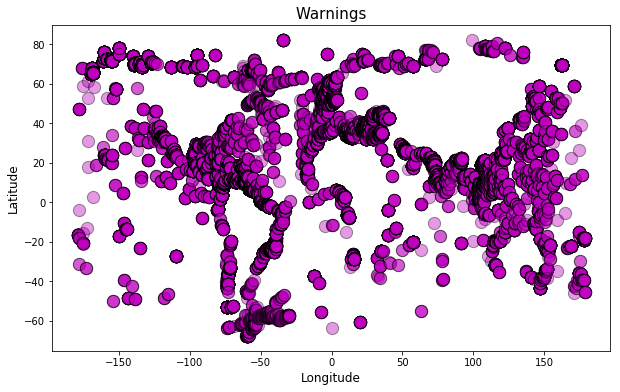

In [3]:
# plot the reduced set of coordinate points
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(df['lon_centroid'],df['lat_centroid'], c='m', edgecolor='k', alpha=.4, s=150)
 
# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Warnings', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
 
 
plt.show()

In [11]:
import math

In [12]:
x = df['lon_centroid'].values * math.pi / 180.
y = df['lat_centroid'].values * math.pi / 180.

In [46]:
xy_train  = np.vstack([ y, x]).T


In [62]:
df

,lon_centroid,lat_centroid,labels
0,-179.150000,-16.091666,0
1,-179.106667,-16.743333,0
2,-179.106667,-16.743333,0
3,-179.106667,-16.743333,0
4,-179.106667,-16.743333,0
5,-179.106667,-16.743333,0
6,-179.106667,-16.743333,0
7,-179.106667,-16.743333,0
8,-179.106667,-16.743333,0
9,-179.106667,-16.743333,0


In [63]:
x[0] * math.pi / 180.

-0.05457221075478884

In [47]:
xy_train

array([[-0.28085255, -3.12675735],
       [-0.29222629, -3.12600105],
       [-0.29222629, -3.12600105],
       ...,
       [-0.79612572,  3.11823531],
       [-0.79612572,  3.11823531],
       [-0.79612572,  3.11823531]])

In [65]:
db = DBSCAN(eps = .04, min_samples = 15)
labels = db.fit_predict(df)

In [55]:
len(labels)

53954

In [56]:
df['labels'] = labels

In [57]:
df.describe()

,lon_centroid,lat_centroid,labels
count,53954.000000,53954.000000,53954.000000
mean,-3.944827,23.571158,69.094747
std,87.707597,29.586743,43.246688
min,-179.150000,-67.650000,-1.000000
25%,-64.522500,7.835000,37.000000
50%,-12.303334,19.271667,69.000000
75%,71.777667,44.895427,102.000000
max,178.661723,82.475196,174.000000


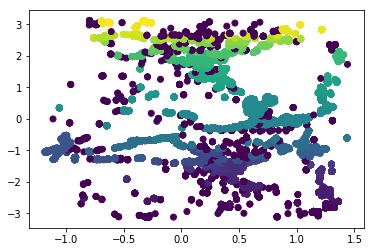

In [58]:
plt.scatter(xy_train.T[0], xy_train.T[1], c=df['labels'])

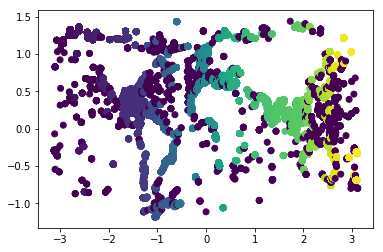

In [45]:
plt.scatter(xy_train.T[0], xy_train.T[1], c=df['labels'])

In [59]:
df['labels'].unique()

array([  0,  -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  36,  35,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  61,  60,  62,  63,
        64,  65,  67,  66,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        79,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  96,  95,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 124, 123, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 140,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174])

In [26]:
coords = df.as_matrix(columns=['lat_centroid', 'lon_centroid'])
db = DBSCAN(eps=0.2, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
y_db = db.fit_predict(distance_matrix)

X['cluster'] = y_db

plt.scatter(X['lat'], X['lng'], c=X['cluster'])
plt.show()

C:\Users\Katie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


NameError: name 'distance_matrix' is not defined